# Exploratory Data Analysis (EDA)

### Imports

In [1]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from constants import *

### Load Dataset

In [2]:
data, _ = arff.loadarff(DATA_DIRECTORY + 'MagicTelescope.arff')
df = pd.DataFrame(data)
df

,ID,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,1.0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,b'g'
1,2.0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,b'g'
2,3.0,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,b'g'
3,4.0,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,b'g'
4,5.0,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,b'g'
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,19016.0,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,b'h'
19016,19017.0,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,b'h'
19017,19018.0,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,b'h'
19018,19019.0,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,b'h'


### Anàlisis Individual:

Conteo de cada clase:
class:
b'g'    12332
b'h'     6688
Name: count, dtype: int64

Proporción (en %):
class:
b'g'    64.837014
b'h'    35.162986
Name: proportion, dtype: float64


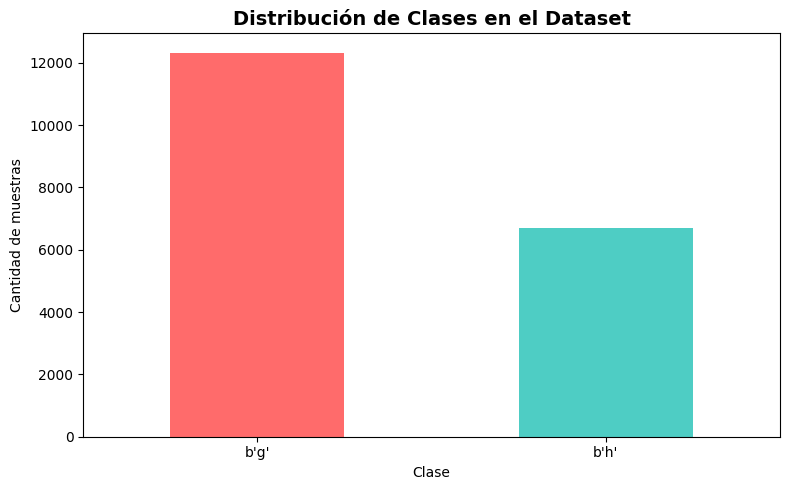

In [4]:
# Distribuir de la columna clase
print("Conteo de cada clase:")
print(df["class:"].value_counts())
print("\nProporción (en %):")
print(df["class:"].value_counts(normalize=True) * 100)

# Visualizar
fig, ax = plt.subplots(figsize=(8, 5))
df["class:"].value_counts().plot(kind='bar', ax=ax, color=['#FF6B6B', '#4ECDC4'])
ax.set_title('Distribución de Clases en el Dataset', fontsize=14, fontweight='bold')
ax.set_xlabel('Clase')
ax.set_ylabel('Cantidad de muestras')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

,ID,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,9510.500000,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,5490.745396,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,1.000000,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,4755.750000,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,9510.500000,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,14265.250000,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,19020.000000,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


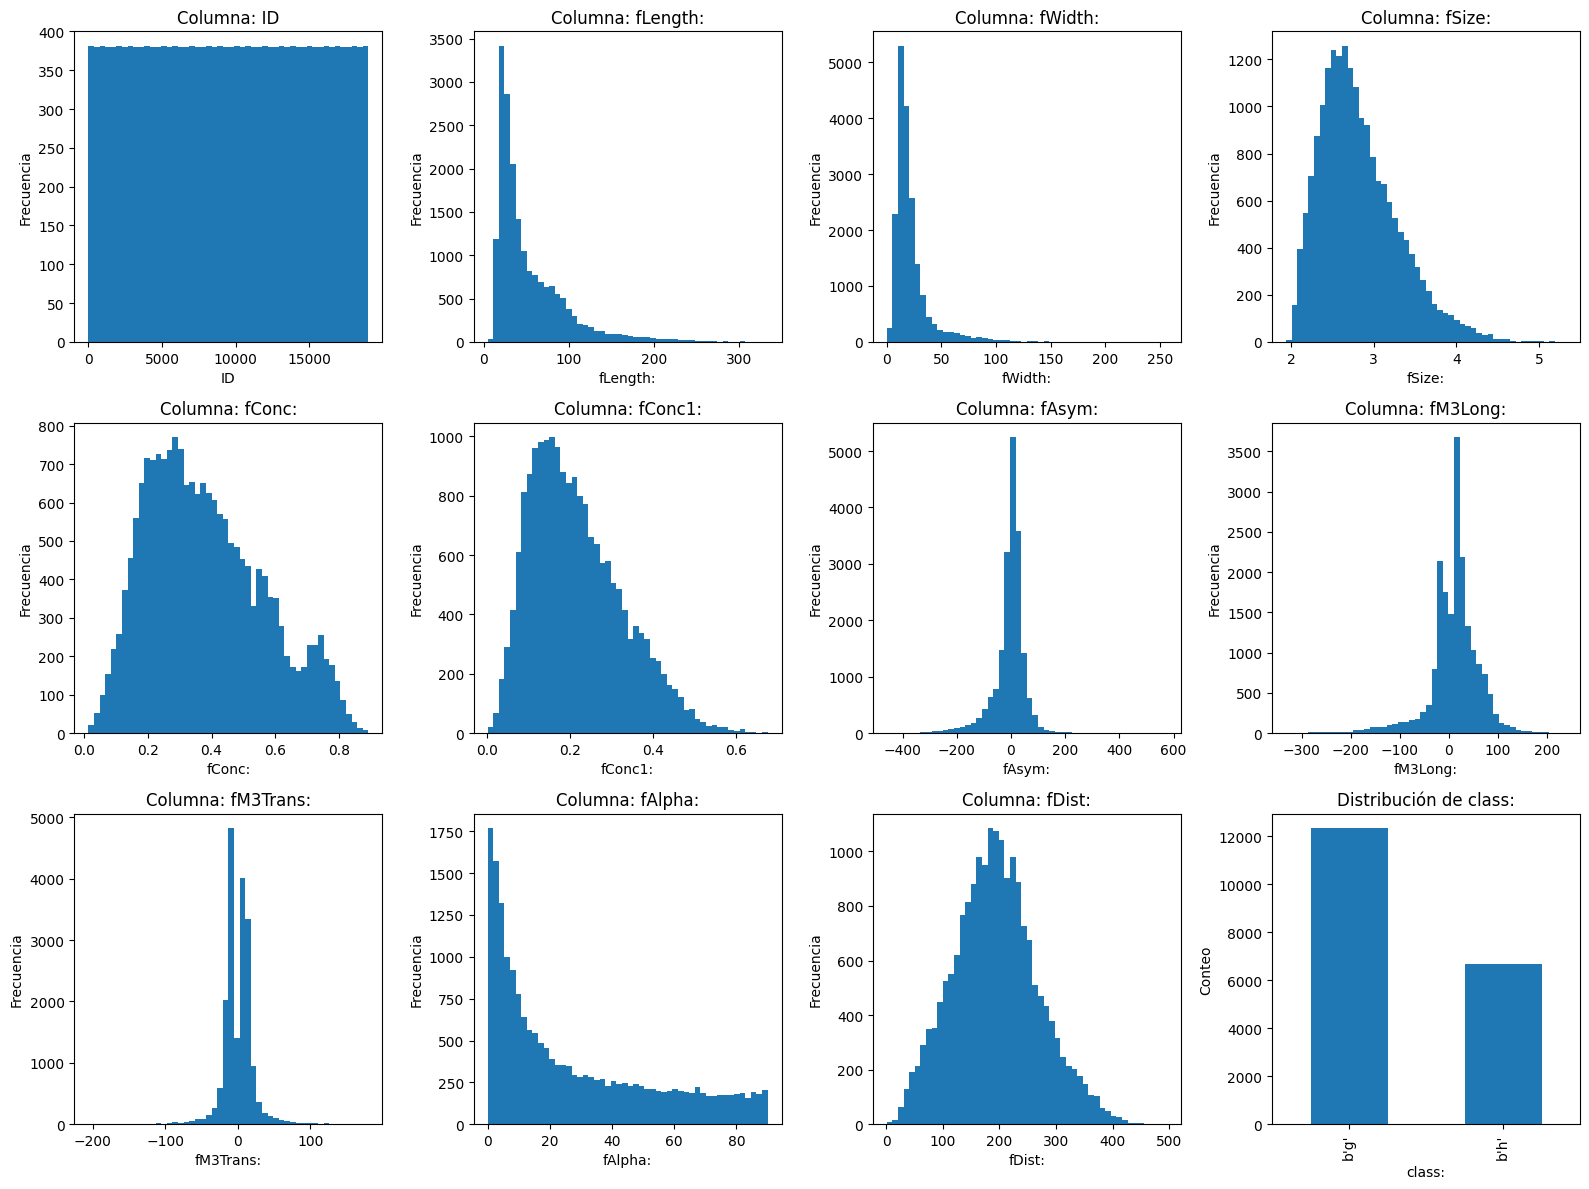

In [3]:
display(df.describe())

numeric_cols = df.select_dtypes(include='number').columns
n_numeric = len(numeric_cols)

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for idx, column in enumerate(numeric_cols):
    df[column].plot(kind='hist', bins=50, title=f"Columna: {column}", ax=axes[idx], xlabel=column, ylabel='Frecuencia')

df["class:"].value_counts().plot(kind='bar', ax=axes[n_numeric], title='Distribución de class:', xlabel='class:', ylabel='Conteo')

for idx in range(n_numeric + 1, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

Tenir present que les etiquetes a predir tenen un biaix

In [ ]:
print("DATASET - NaN Analysis")

total_rows = len(df)
nan_info = pd.DataFrame(
    {
        "Column": df.columns,
        "NaN Count": df.isnull().sum().values,
        "NaN Percentage": (df.isnull().sum().values / total_rows * 100).round(2),
    }
)

# Ordenar por cantidad de NaNs descendente
nan_info = nan_info.sort_values("NaN Count", ascending=False)

print(f"\nTotal rows: {total_rows}")
print("\nColumns with NaNs:")
print(nan_info[nan_info["NaN Count"] > 0].to_string(index=False))

if nan_info["NaN Count"].sum() == 0:
    print("\n✓ No NaN values found in this dataset")

print("\n" + "-" * 50)

DATASET - NaN Analysis

Total rows: 19020

Columns with NaNs:
Empty DataFrame
Columns: [Column, NaN Count, NaN Percentage]
Index: []

✓ No NaN values found in this dataset

--------------------------------------------------


: 

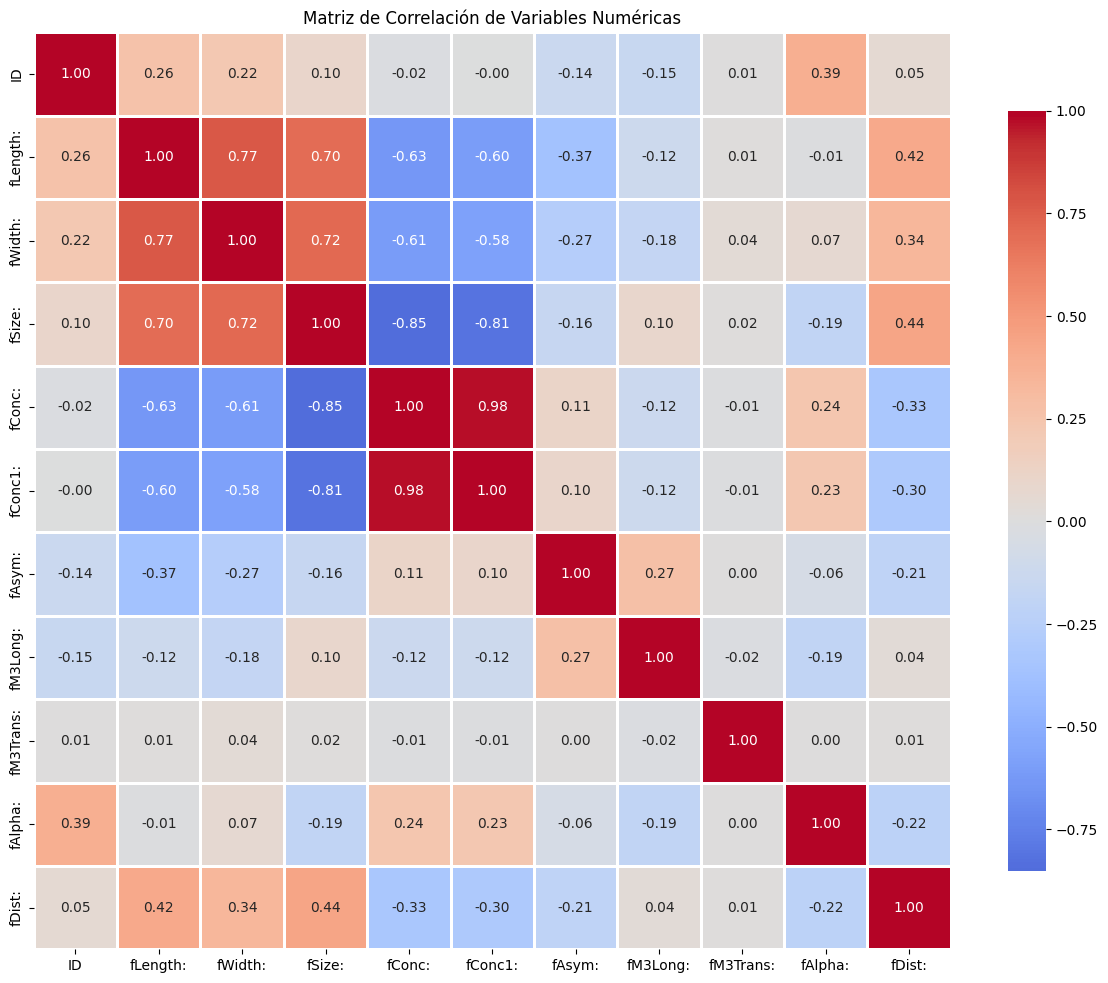

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()